Distance between apple and pencil: 232.16 pixels


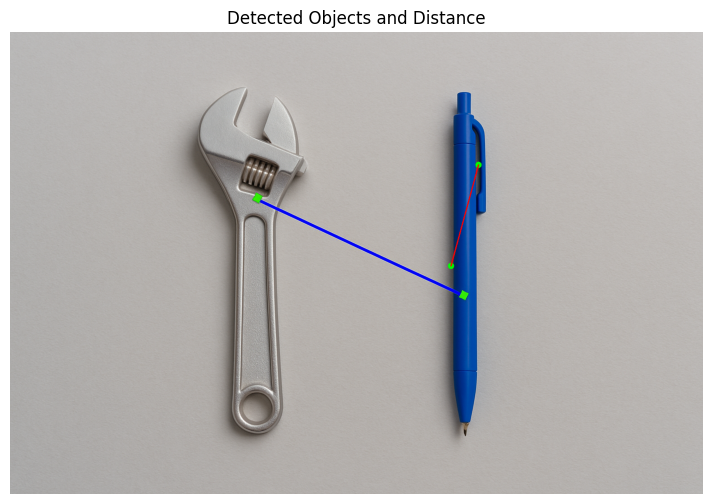

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Step 1: Load the image
image_path = 'pencil.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Preprocess image (blur + binary threshold)
blurred = cv2.GaussianBlur(img_gray, (7, 7), 0)
_, thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY_INV)

# Step 3: Find contours (objects)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Sort and get the top 2 largest contours (apple & pencil)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]

def get_centroid(c):
    M = cv2.moments(c)
    if M["m00"] == 0:
        return None
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    return (cx, cy)

# Step 5: Get centroids
centroids = [get_centroid(c) for c in contours]

# Step 6: Draw centroids and line
for point in centroids:
    cv2.circle(img_rgb, point, 7, (0, 255, 0), -1)

cv2.line(img_rgb, centroids[0], centroids[1], (255, 0, 0), 2)

# Step 7: Calculate distance between objects
dist = distance.euclidean(centroids[0], centroids[1])
print(f"Distance between apple and pencil: {dist:.2f} pixels")

# Step 8: Show image
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title("Detected Objects and Distance")
plt.axis('off')
plt.show()
